In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

from sklearn.metrics import mean_absolute_percentage_error
import warnings
warnings.filterwarnings("ignore")

# IMPORTING THE DATASETS

In [37]:
data_claim = pd.read_csv('Train_Claim.csv',na_values=['?','MISSEDDATA','MISSINGVALUE','-5'])
data_claim_1=pd.read_csv('Train_Claim.csv',na_values=['?','MISSEDDATA','MISSINGVALUE','-5'])

In [54]:
test_data_claim = pd.read_csv(r'C:\Users\win10\Desktop\New folder (4)\capstone-files\TestData\Test_Claim.csv',na_values=['?','MISSEDDATA','MISSINGVALUE','-5'])
test_data_claim1 = pd.read_csv(r'C:\Users\win10\Desktop\New folder (4)\capstone-files\TestData\Test_Claim.csv',na_values=['?','MISSEDDATA','MISSINGVALUE','-5'])

In [39]:
data_claim.isnull().sum()

CustomerID                   0
DateOfIncident               0
TypeOfIncident               0
TypeOfCollission          5162
SeverityOfIncident           0
AuthoritiesContacted         0
IncidentState                0
IncidentCity                 0
IncidentAddress              0
IncidentTime                31
NumberOfVehicles             0
PropertyDamage           10459
BodilyInjuries               0
Witnesses                   46
PoliceReport              9805
AmountOfTotalClaim          50
AmountOfInjuryClaim          0
AmountOfPropertyClaim        0
AmountOfVehicleDamage        0
dtype: int64

# PREPROCESSING THE DATA

In [40]:
data_claim['PoliceReport']=data_claim['PoliceReport'].replace(to_replace = np.nan, value ='dont know')
data_claim.columns

Index(['CustomerID', 'DateOfIncident', 'TypeOfIncident', 'TypeOfCollission',
       'SeverityOfIncident', 'AuthoritiesContacted', 'IncidentState',
       'IncidentCity', 'IncidentAddress', 'IncidentTime', 'NumberOfVehicles',
       'PropertyDamage', 'BodilyInjuries', 'Witnesses', 'PoliceReport',
       'AmountOfTotalClaim', 'AmountOfInjuryClaim', 'AmountOfPropertyClaim',
       'AmountOfVehicleDamage'],
      dtype='object')

In [41]:
test_data_claim['PoliceReport']=test_data_claim['PoliceReport'].replace(to_replace = np.nan, value ='dont know')

In [42]:
data_claim['Witnesses'].value_counts()

2.0    8449
1.0    8345
0.0    6128
3.0    5868
Name: Witnesses, dtype: int64

In [43]:
data_claim['Witnesses'].mode()[0]

2.0

In [44]:
test_data_claim['Witnesses'].fillna(data_claim['Witnesses'].mode()[0],inplace=True)

In [45]:
data_claim['Witnesses'].fillna(data_claim['Witnesses'].mode()[0],inplace=True)

In [46]:
data_claim.drop(['CustomerID','DateOfIncident','IncidentTime','PropertyDamage','AmountOfTotalClaim'],axis=1,inplace=True)

In [47]:
test_data_claim.drop(['CustomerID','DateOfIncident','IncidentTime','PropertyDamage','AmountOfTotalClaim'],axis=1,inplace=True)

In [48]:
data_claim.isnull().sum()

TypeOfIncident              0
TypeOfCollission         5162
SeverityOfIncident          0
AuthoritiesContacted        0
IncidentState               0
IncidentCity                0
IncidentAddress             0
NumberOfVehicles            0
BodilyInjuries              0
Witnesses                   0
PoliceReport                0
AmountOfInjuryClaim         0
AmountOfPropertyClaim       0
AmountOfVehicleDamage       0
dtype: int64

In [49]:
test_data_claim.isnull().sum()

TypeOfIncident              0
TypeOfCollission         1763
SeverityOfIncident          0
AuthoritiesContacted        0
IncidentState               0
IncidentCity                0
IncidentAddress             0
NumberOfVehicles            0
BodilyInjuries              0
Witnesses                   0
PoliceReport                0
AmountOfInjuryClaim         0
AmountOfPropertyClaim       0
AmountOfVehicleDamage       0
dtype: int64

# MODEL TRAINING

In [10]:
train=data_claim[data_claim['TypeOfCollission'].notnull()]
test=data_claim[data_claim['TypeOfCollission'].isnull()]
test.drop('TypeOfCollission',axis=1,inplace=True)

In [11]:
x=train.drop('TypeOfCollission',axis=1)
y=train['TypeOfCollission']

In [12]:
cat_cols = train[['TypeOfIncident', 
       'SeverityOfIncident', 'AuthoritiesContacted', 'IncidentState',
       'IncidentCity','NumberOfVehicles','IncidentAddress',
        'BodilyInjuries', 'Witnesses','PoliceReport']].columns
num_cols = train[['AmountOfInjuryClaim', 'AmountOfPropertyClaim',
       'AmountOfVehicleDamage']].columns

In [13]:
train[cat_cols] = train[cat_cols].astype('category')

In [14]:
Numeric_transformer=Pipeline([('scalar1',StandardScaler())])
categorical_transformer=Pipeline([('ohe',OneHotEncoder(handle_unknown='ignore'))])
preprocessor=(ColumnTransformer(transformers=[('num',Numeric_transformer,num_cols),('cat',categorical_transformer,cat_cols)]))

In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
RF_pipe = Pipeline([('pp',preprocessor),('DT',KNeighborsClassifier(n_neighbors=7))])

In [17]:
RF_pipe.fit(x,y)

Pipeline(steps=[('pp',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scalar1',
                                                                   StandardScaler())]),
                                                  Index(['AmountOfInjuryClaim', 'AmountOfPropertyClaim',
       'AmountOfVehicleDamage'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['TypeOfIncident', 'SeverityOfIncident', 'AuthoritiesContacted',
       'IncidentState', 'IncidentCity', 'NumberOfVehicles', 'IncidentAddress',
       'BodilyInjuries', 'Witnesses', 'PoliceReport'],
      dtype='object'))])),
                ('DT', KNeighborsClassifier(n_neighbors=7))])

In [18]:
train_pred_RFPipe = RF_pipe.predict(x)
test_pred_RFPipe = RF_pipe.predict(test)

In [19]:
def evaluate_model(act, pred):
    from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
    print("Confusion Matrix \n", confusion_matrix(act, pred))
    print("Accuracy : ", accuracy_score(act, pred))

In [20]:
evaluate_model(y,train_pred_RFPipe)

Confusion Matrix 
 [[5862  760  624]
 [ 873 6743  945]
 [ 787 1060 6020]]
Accuracy :  0.7867280560952944


<AxesSubplot:ylabel='count'>

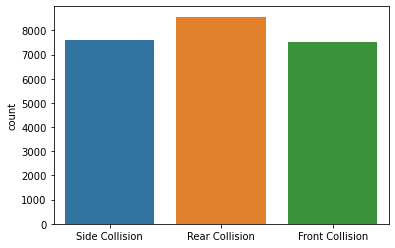

In [21]:
sns.countplot(train_pred_RFPipe)

<AxesSubplot:xlabel='TypeOfCollission', ylabel='count'>

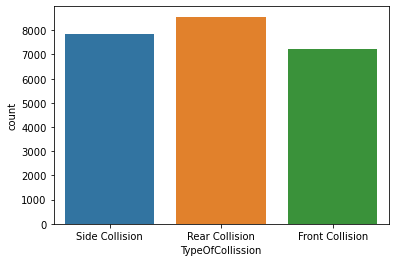

In [22]:
sns.countplot(y)

<AxesSubplot:ylabel='count'>

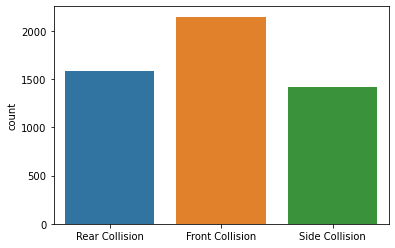

In [23]:
sns.countplot(test_pred_RFPipe)

In [24]:
test1=data_claim_1[data_claim_1['TypeOfCollission'].isnull()]
train1=data_claim_1[data_claim_1['TypeOfCollission'].notnull()]

In [26]:
test1

,CustomerID,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,NumberOfVehicles,PropertyDamage,BodilyInjuries,Witnesses,PoliceReport,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage
16,Cust10018,2015-02-28,Parked Car,NaN,Minor Damage,Police,State6,City1,Location 1963,7.0,1,YES,0,2.0,NO,5371.0,679,521,4171
17,Cust10019,2015-02-28,Parked Car,NaN,Minor Damage,Police,State6,City1,Location 1963,7.0,1,YES,0,2.0,YES,5408.0,689,524,4195
18,Cust10021,2015-01-03,Vehicle Theft,NaN,Trivial Damage,None,State4,City5,Location 1449,10.0,1,NaN,2,1.0,NaN,6190.0,619,1208,4363
42,Cust1005,2015-02-17,Vehicle Theft,NaN,Minor Damage,None,State5,City1,Location 1518,20.0,1,NO,0,1.0,NO,6500.0,1300,650,4550
55,Cust10067,2015-01-16,Vehicle Theft,NaN,Minor Damage,None,State7,City5,Location 1842,8.0,1,YES,1,0.0,NO,5892.0,857,857,4178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28817,Cust9975,2015-02-19,Parked Car,NaN,Trivial Damage,Police,State7,City4,Location 1105,8.0,1,NaN,2,2.0,NaN,4981.0,787,787,3407
28818,Cust9976,2015-01-17,Parked Car,NaN,Minor Damage,None,State8,City1,Location 1391,15.0,1,NaN,1,1.0,YES,5183.0,1185,804,3194
28819,Cust9977,2015-02-07,Parked Car,NaN,Trivial Damage,None,State8,City1,Location 1391,6.0,1,NO,2,2.0,YES,3589.0,701,625,2263
28830,Cust9992,2015-01-11,Vehicle Theft,NaN,Trivial Damage,None,State9,City4,Location 1858,4.0,1,NO,0,2.0,NaN,7262.0,698,1304,5260


In [27]:
test1['TypeOfCollission']=test_pred_RFPipe

In [28]:
data_claim=pd.concat([train1,test1],axis=0)

In [29]:
data_claim.nunique()

CustomerID               28836
DateOfIncident              72
TypeOfIncident               4
TypeOfCollission             3
SeverityOfIncident           4
AuthoritiesContacted         5
IncidentState                7
IncidentCity                 7
IncidentAddress           1000
IncidentTime                24
NumberOfVehicles             4
PropertyDamage               2
BodilyInjuries               3
Witnesses                    4
PoliceReport                 2
AmountOfTotalClaim       21975
AmountOfInjuryClaim      11958
AmountOfPropertyClaim    11785
AmountOfVehicleDamage    20041
dtype: int64

In [30]:
data_claim.isnull().sum()

CustomerID                   0
DateOfIncident               0
TypeOfIncident               0
TypeOfCollission             0
SeverityOfIncident           0
AuthoritiesContacted         0
IncidentState                0
IncidentCity                 0
IncidentAddress              0
IncidentTime                31
NumberOfVehicles             0
PropertyDamage           10459
BodilyInjuries               0
Witnesses                   46
PoliceReport              9805
AmountOfTotalClaim          50
AmountOfInjuryClaim          0
AmountOfPropertyClaim        0
AmountOfVehicleDamage        0
dtype: int64

<AxesSubplot:xlabel='TypeOfCollission', ylabel='count'>

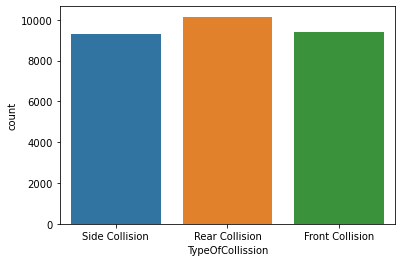

In [31]:
sns.countplot(data_claim['TypeOfCollission'])

In [32]:
data_claim.to_csv('train_claim_new.csv')

In [61]:
test_data_claim=test_data_claim[test_data_claim['TypeOfCollission'].isnull()]

In [62]:
x_test_data_claim=test_data_claim.drop('TypeOfCollission',axis=1)

In [63]:
test_pred_test = RF_pipe.predict(x_test_data_claim)

<AxesSubplot:ylabel='count'>

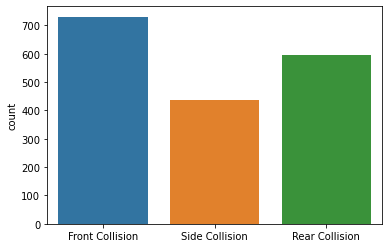

In [64]:
sns.countplot(test_pred_test)

In [65]:
train2=test_data_claim1[test_data_claim1['TypeOfCollission'].notnull()]
test2=test_data_claim1[test_data_claim1['TypeOfCollission'].isnull()]


In [66]:
test2.shape

(1763, 19)

In [67]:
test_pred_test.shape

(1763,)

In [68]:
test2['TypeOfCollission']=test_pred_test

In [69]:
test_data_claim=pd.concat([train2,test2],axis=0)

In [71]:
test_data_claim.isnull().sum()

CustomerID                  0
DateOfIncident              0
TypeOfIncident              0
TypeOfCollission            0
SeverityOfIncident          0
AuthoritiesContacted        0
IncidentState               0
IncidentCity                0
IncidentAddress             0
IncidentTime                7
NumberOfVehicles            0
PropertyDamage           3199
BodilyInjuries              0
Witnesses                  12
PoliceReport             3014
AmountOfTotalClaim          8
AmountOfInjuryClaim         0
AmountOfPropertyClaim       0
AmountOfVehicleDamage       0
dtype: int64

In [72]:
test_data_claim.to_csv('test_data_claim_new.csv')